# Library used

In [124]:
import folium as folium
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno

# Useful functions

In [125]:
# Returns tree number
def getTreeNumber(dataF):
    count = len(dataF)
    print("Total number of trees:", count, '\n')
    return count


# Returns data frame columns
def getColumns(dataF):
    return dataF.columns.values


# Prints data frame's columns
def printColumns(col):
    print(col)
    print(len(col))

# Retrieving data from the csv file

In [144]:
filename = "./resources/p2-arbres-fr.csv"
data = pd.read_csv(filename, encoding='utf-8', sep=';')
data

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,99874,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,19,Marronnier,Aesculus,hippocastanum,NaN,20,5,NaN,0.0,48.857620,2.320962
1,99875,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,20,If,Taxus,baccata,NaN,65,8,A,NaN,48.857656,2.321031
2,99876,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,21,If,Taxus,baccata,NaN,90,10,A,NaN,48.857705,2.321061
3,99877,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,22,Erable,Acer,negundo,NaN,60,8,A,NaN,48.857722,2.321006
4,99878,Arbre,Jardin,PARIS 17E ARRDT,NaN,NaN,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000G0037,Arbre à miel,Tetradium,daniellii,NaN,38,0,NaN,NaN,48.890435,2.315289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200132,2024741,Arbre,Jardin,BOIS DE VINCENNES,NaN,NaN,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,720170151,NaN,Castanea,fargesii,NaN,0,0,NaN,0.0,48.821957,2.456264
200133,2024742,Arbre,Jardin,BOIS DE VINCENNES,NaN,NaN,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,720170152,Arbre aux mouchoirs,Davidia,involucrata,NaN,0,0,NaN,0.0,48.823254,2.457935
200134,2024743,Arbre,Jardin,BOIS DE VINCENNES,NaN,NaN,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,720170153,Peuplier,Populus,simonii,NaN,0,0,NaN,0.0,48.822907,2.457970
200135,2024744,Arbre,Jardin,BOIS DE VINCENNES,NaN,NaN,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,720170154,Chêne,Quercus,n. sp.,NaN,0,0,NaN,0.0,48.822522,2.455956


## Showing how many values are missing in each column

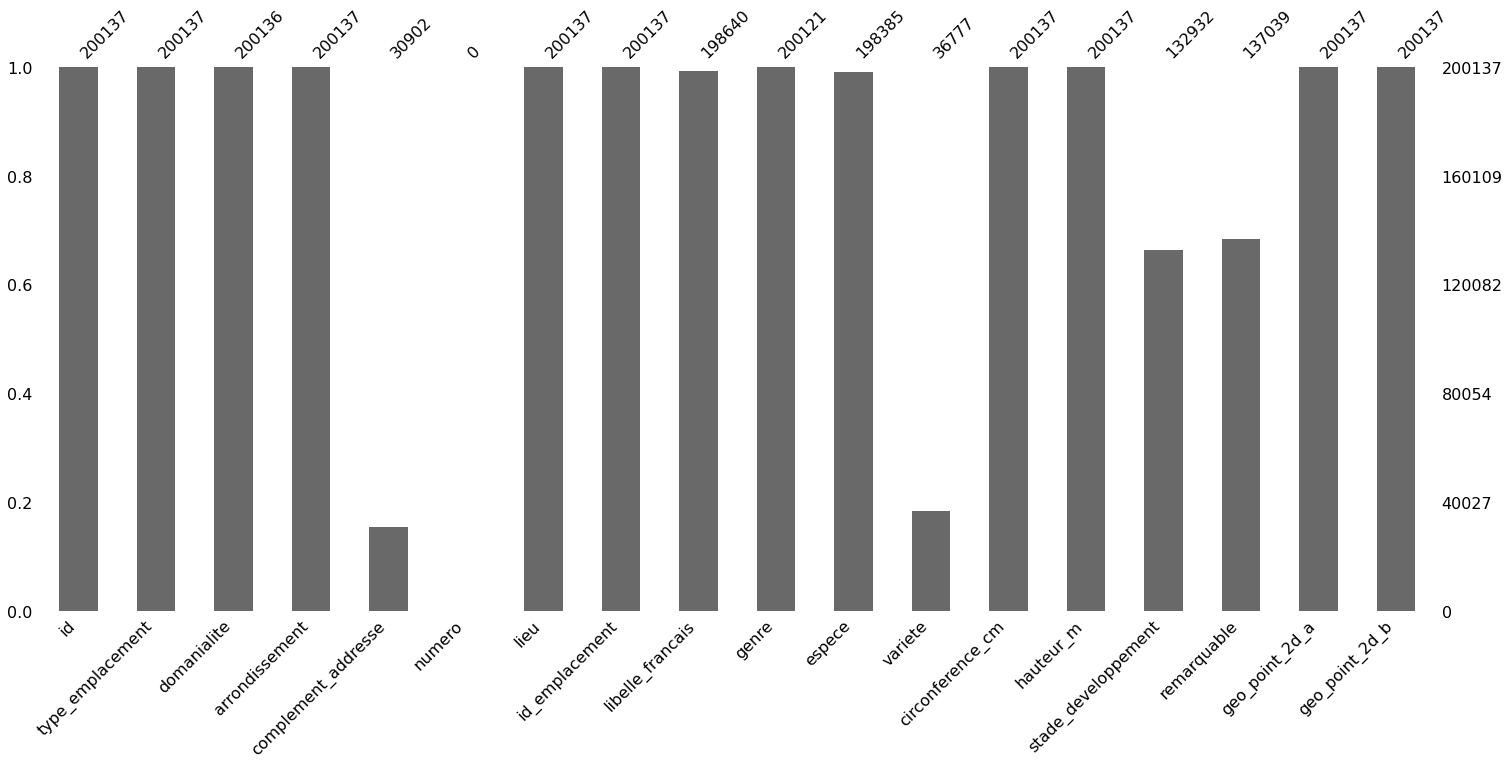

In [127]:
missing_values = msno.bar(data)

# Boxplots

## Finding maximum circumference

<AxesSubplot:>

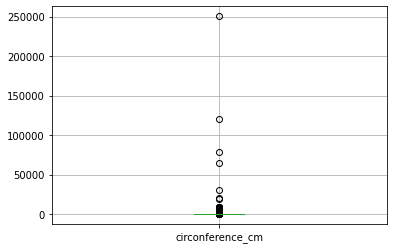

In [145]:
circum_boxplot = data.boxplot(column=['circonference_cm'])
circum_boxplot

<AxesSubplot:>

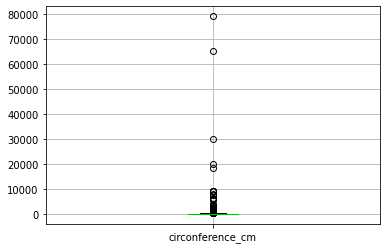

In [149]:
data.drop(data.index[(data["circonference_cm"] > 120000)], axis=0, inplace=True)
circum_boxplot = data.boxplot(column=['circonference_cm'])
circum_boxplot

<AxesSubplot:>

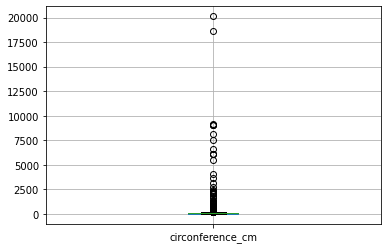

In [150]:
data.drop(data.index[(data["circonference_cm"] > 30000)], axis=0, inplace=True)
circum_boxplot = data.boxplot(column=['circonference_cm'])
circum_boxplot

<AxesSubplot:>

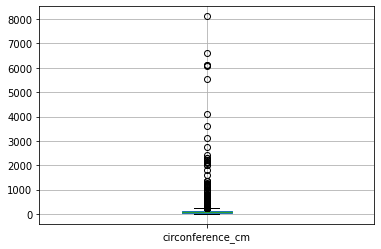

In [158]:
data.drop(data.index[(data["circonference_cm"] > 10000)], axis=0, inplace=True)
circum_boxplot = data.boxplot(column=['circonference_cm'])
circum_boxplot

<AxesSubplot:>

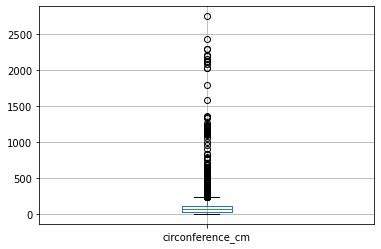

In [159]:
data.drop(data.index[(data["circonference_cm"] > 3000)], axis=0, inplace=True)
circum_boxplot = data.boxplot(column=['circonference_cm'])
circum_boxplot

<AxesSubplot:>

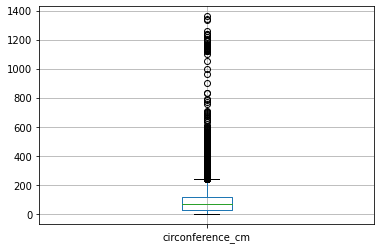

In [160]:
data.drop(data.index[(data["circonference_cm"] > 1500)], axis=0, inplace=True)
circum_boxplot = data.boxplot(column=['circonference_cm'])
circum_boxplot

<AxesSubplot:>

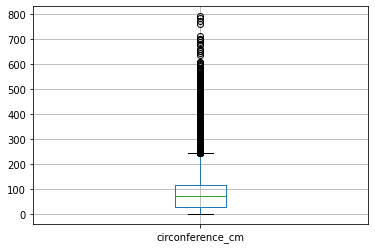

In [161]:
data.drop(data.index[(data["circonference_cm"] > 800)], axis=0, inplace=True)
circum_boxplot = data.boxplot(column=['circonference_cm'])
circum_boxplot

By reducing the maximum value for maximum circumference, we made a much more readable boxplot that will help us remove absurd values.

<AxesSubplot:>

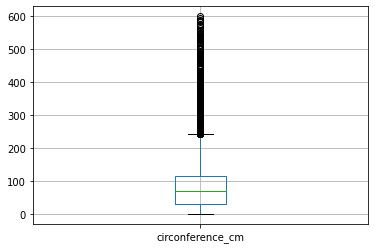

In [162]:
data.drop(data.index[(data["circonference_cm"] > 600)], axis=0, inplace=True)
circum_boxplot = data.boxplot(column=['circonference_cm'])
circum_boxplot

# Finding maximum height

<AxesSubplot:>

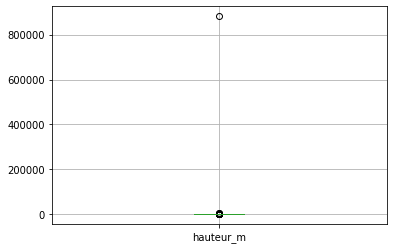

In [146]:
height_boxplot = data.boxplot(column=['hauteur_m'])
height_boxplot

<AxesSubplot:>

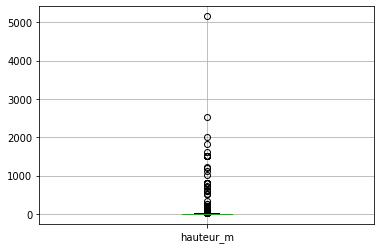

In [148]:
data.drop(data.index[(data["hauteur_m"] > 50000)], axis=0, inplace=True)
height_boxplot = data.boxplot(column=['hauteur_m'])
height_boxplot

<AxesSubplot:>

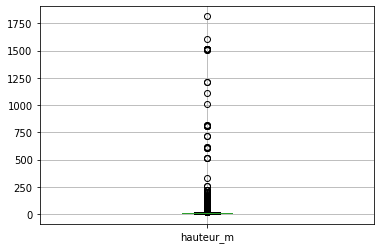

In [155]:
data.drop(data.index[(data["hauteur_m"] > 2000)], axis=0, inplace=True)
height_boxplot = data.boxplot(column=['hauteur_m'])
height_boxplot

<AxesSubplot:>

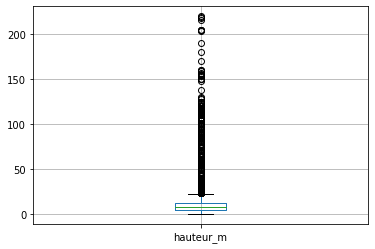

In [156]:
data.drop(data.index[(data["hauteur_m"] > 250)], axis=0, inplace=True)
height_boxplot = data.boxplot(column=['hauteur_m'])
height_boxplot

<AxesSubplot:>

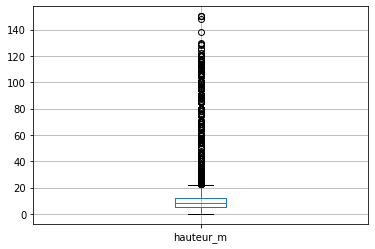

In [157]:
data.drop(data.index[(data["hauteur_m"] > 150)], axis=0, inplace=True)
height_boxplot = data.boxplot(column=['hauteur_m'])
height_boxplot

# Important values

In [130]:
columns = getColumns(data)
row_count = getTreeNumber(data)
PARIS_LOCATION = (48.856614, 2.3522219)

Total number of trees: 200137 



# Data cleanup

We remove columns we won't be using for our study, either because they aren't useful or because they aren't filled with enough data.
We also remove lines that weren't filled correctly, for example if the tree circunference or height is equal to 0, or if the tree is taller or wider than the biggest tree known in Paris.

In [131]:
# Removing unwanted columns from data frame
def cleaningColumns(dataF):
    dataF.drop(['type_emplacement', 'domanialite', 'complement_addresse','numero'], axis=1, inplace=True)
    dataF.drop(['id_emplacement','variete', 'stade_developpement', 'remarquable'], axis=1, inplace=True)
    return dataF

# Removing unwanted lines from data frame
def cleaningRows(dataF):
    dataF.drop(dataF.index[(dataF["circonference_cm"] <= 0)], axis=0, inplace=True)
    dataF.drop(dataF.index[(dataF["hauteur_m"] <= 0)], axis=0, inplace=True)
    # biggest circumference paris tree 8m -> 800 cm
    dataF.drop(dataF.index[(dataF["circonference_cm"] > 800)], axis=0, inplace=True)
    # tallest paris tree 35 m -> 3500 cm
    dataF.drop(dataF.index[(dataF["hauteur_m"] > 40)], axis=0, inplace=True)
    return dataF


In [132]:
# Data clean up
data = cleaningColumns(data)
data = cleaningRows(data)

# Data after cleanup

In [133]:
# Save cleaned up csv
data.to_csv('./resources/cleanedDF.csv', encoding='utf-8', sep=';', index=False)
data.reset_index(drop=True)

,id,arrondissement,lieu,libelle_francais,genre,espece,circonference_cm,hauteur_m,geo_point_2d_a,geo_point_2d_b
0,99874,PARIS 7E ARRDT,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,Marronnier,Aesculus,hippocastanum,20,5,48.857620,2.320962
1,99875,PARIS 7E ARRDT,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,If,Taxus,baccata,65,8,48.857656,2.321031
2,99876,PARIS 7E ARRDT,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,If,Taxus,baccata,90,10,48.857705,2.321061
3,99877,PARIS 7E ARRDT,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,Erable,Acer,negundo,60,8,48.857722,2.321006
4,99881,PARIS 16E ARRDT,SQUARE ALEXANDRE ET RENE PARODI / 1 PLACE DE L...,Platane,Platanus,x hispanica,260,17,48.876722,2.280222
...,...,...,...,...,...,...,...,...,...,...
159991,2023464,PARIS 20E ARRDT,RUE DU GENERAL NIESSEL,Chêne,Quercus,cerris,20,5,48.848074,2.409116
159992,2023465,PARIS 20E ARRDT,RUE DU GENERAL NIESSEL,Chêne,Quercus,cerris,20,5,48.848226,2.409147
159993,2023466,PARIS 20E ARRDT,RUE DU GENERAL NIESSEL,Chêne,Quercus,cerris,20,5,48.848379,2.409179
159994,2023467,PARIS 20E ARRDT,RUE DU GENERAL NIESSEL,Chêne,Quercus,cerris,20,5,48.848533,2.409209


# Work on the data

## Species percentage in Paris

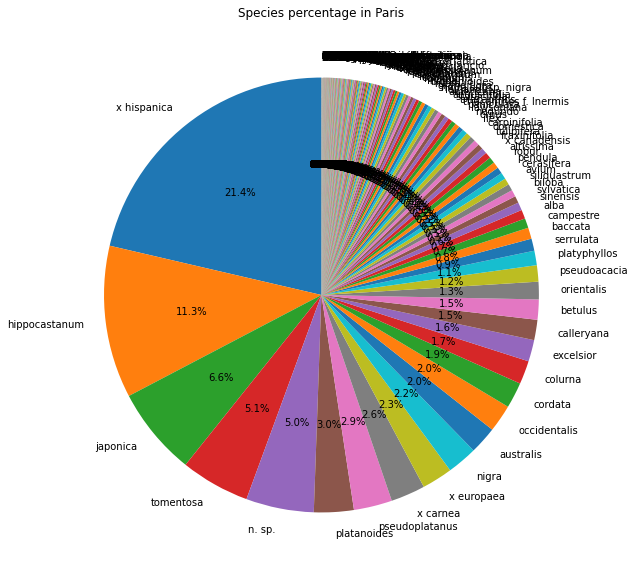

In [134]:
# Top 10 most present species in Paris
species_group = data.assign(dummy='').groupby(['espece']).size().sort_values(ascending=False)
species_group.plot(kind='pie', subplots=True, startangle=90, figsize=(15, 10), autopct='%1.1f%%')
plt.title('Species percentage in Paris')
plt.ylabel('')
plt.savefig("./resources/species_percentage.png")
plt.show()

## Tree number percentage per district

### On a wheel

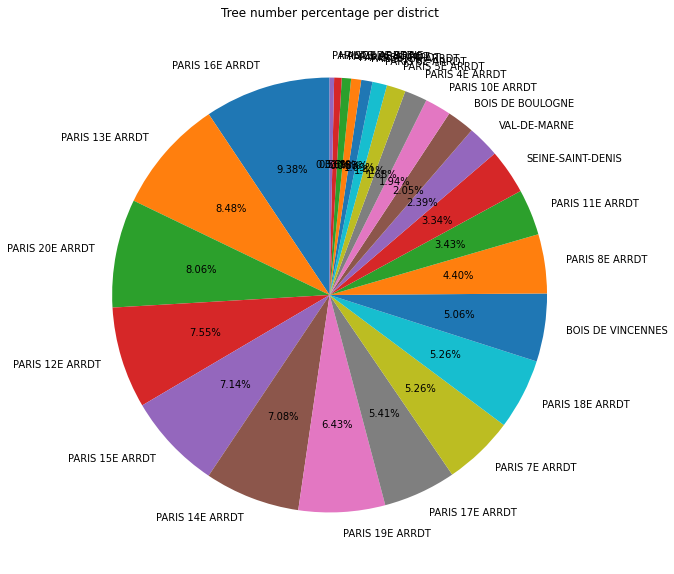

In [135]:
# Tree number percentage per 'arrondissement'
district_group = data.assign(dummy='').groupby(['arrondissement']).size().sort_values(ascending=False)
district_group.plot(kind='pie', subplots=True, startangle=90, figsize=(15, 10), autopct='%1.2f%%')
plt.title('Tree number percentage per district')
plt.ylabel('')
plt.savefig("./resources/tree_number_percentage_per_district.png")
plt.show()

### On the map

In [136]:
# Districts' geolocalisation
first_of_each_district_df = data.groupby(['arrondissement']).nth(0).reset_index()
first_of_each_district_df.drop(['id','lieu', 'circonference_cm', 'hauteur_m', 'genre', 'espece', 'libelle_francais'], axis=1, inplace=True)

district_geoloc = {}
for i in range(len(first_of_each_district_df)):
    loc_a_index = first_of_each_district_df["geo_point_2d_a"][i]
    loc_b_index =  first_of_each_district_df["geo_point_2d_b"][i]
    index = first_of_each_district_df["arrondissement"][i]
    coordinates = (loc_a_index, loc_b_index)
    district_geoloc[index] = coordinates
    
first_of_each_district_df

,arrondissement,geo_point_2d_a,geo_point_2d_b
0,BOIS DE BOULOGNE,48.857614,2.262362
1,BOIS DE VINCENNES,48.841751,2.449273
2,HAUTS-DE-SEINE,48.804707,2.310855
3,PARIS 10E ARRDT,48.878544,2.368362
4,PARIS 11E ARRDT,48.864818,2.381492
5,PARIS 12E ARRDT,48.835428,2.380136
6,PARIS 13E ARRDT,48.821805,2.376479
7,PARIS 14E ARRDT,48.821643,2.340703
8,PARIS 15E ARRDT,48.831192,2.299643
9,PARIS 16E ARRDT,48.876722,2.280222


In [137]:
# Tree number per district
numb_per_district = data.assign(dummy='').groupby(['arrondissement']).size()

# Creating map
m = folium.Map(location=[48.856614, 2.3522219], width=750, height=500)

# Placing markers for each district on the map
for index, value in numb_per_district.items():
    if index in district_geoloc:
        localisation = district_geoloc[index]
        text = str(value) +" trees are planted in ", index
        marker = folium.Marker(
            location=localisation,
            popup=text)
        marker.add_to(m)

# Printing
m

## Tree number percentage per place

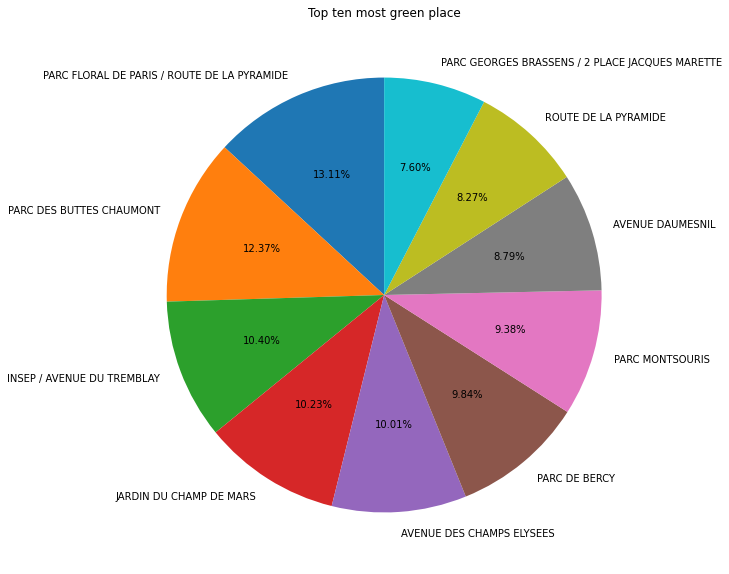

In [138]:
# Tree number percentage per place
place_group = data.assign(dummy=1).groupby(['lieu']).size().sort_values(ascending=False)
place_group.head(10).plot(kind='pie', subplots=True, startangle=90, figsize=(15, 10), autopct='%1.2f%%')
plt.title('Top ten most green place')
plt.ylabel('')
plt.savefig("./resources/top_ten_most_green_places.png")
plt.show()

### On the map

In [139]:
# Places' geolocalisation
first_of_each_place_df = data.groupby(['lieu']).nth(0).reset_index()
first_of_each_place_df.drop(['id','arrondissement', 'circonference_cm', 'hauteur_m', 'genre', 'espece', 'libelle_francais'], axis=1, inplace=True)
first_of_each_place_df


"""
district_geoloc = {}
for i in range(len(first_of_each_district_df)):
    loc_a_index = first_of_each_district_df["geo_point_2d_a"][i]
    loc_b_index =  first_of_each_district_df["geo_point_2d_b"][i]
    index = first_of_each_district_df["lieu"][i]
    coordinates = (loc_a_index, loc_b_index)
    district_geoloc[index] = coordinates
"""

'\ndistrict_geoloc = {}\nfor i in range(len(first_of_each_district_df)):\n    loc_a_index = first_of_each_district_df["geo_point_2d_a"][i]\n    loc_b_index =  first_of_each_district_df["geo_point_2d_b"][i]\n    index = first_of_each_district_df["lieu"][i]\n    coordinates = (loc_a_index, loc_b_index)\n    district_geoloc[index] = coordinates\n'

In [140]:
trees_per_place = data.assign(dummy=1).groupby(['lieu']).size().sort_values(ascending=False)

# Tree number per place
numb_per_district = data.assign(dummy='').groupby(['arrondissement']).size()

# Creating map
m = folium.Map(location=[48.856614, 2.3522219], width=750, height=500)

# Placing markers for each district on the map
for index, value in trees_per_place.items():
    """
    if index in place_geoloc:    
        localisation = place_geoloc[index]
        text = str(value) +" % of trees are planted in ", index
        marker = folium.Marker(
            location=localisation,
            popup=text)
        marker.add_to(m)
    """
    text = str(value) +" % of trees are planted in ", index
    marker = folium.Circle(
        location=[60, 10], 
        radius=150000, 
        fill=True
        tooltip="Tooltip text",
        popup=folium.Popup(text, max_width=500)
        )
    
    marker.add_to(m)
    print(index, ':  ', value, '\n')

# Printing
m

SyntaxError: invalid syntax (Temp/ipykernel_16616/2845667399.py, line 25)

## Average height per arrondissement

In [ ]:
# Average height per arrondissement
height_mean = data.groupby(['arrondissement'])['hauteur_m'].mean().reset_index().plot(x='arrondissement',
                                                                                       y='hauteur_m',
                                                                                       kind='bar', 
                                                                                       subplots=True,
                                                                                       figsize=(15, 10),
                                                                                       legend=None)
plt.title('Average height per district in meters')
plt.xlabel('Districts')
plt.ylabel('Height in meters')
plt.savefig("./resources/average_height_per_arrondissement.png")
plt.show()

## Average circumference per district

In [ ]:
# Circumference average per arrondissement
circum_mean = data.groupby(['arrondissement'])['circonference_cm'].mean().reset_index().plot(x='arrondissement',
                                                                                             y='circonference_cm',
                                                                                             kind='bar',
                                                                                             subplots=True,
                                                                                             figsize=(15, 10),
                                                                                             legend=None)
plt.title('Average circumference per district in centimeters')
plt.xlabel('Districts')
plt.ylabel('Circumference in centimeters')
plt.savefig("./resources/average_circumference_per_district.png")
plt.show()